## Analisis a partir de multiples metodos supervisados:

Para esta investigación comenzaremos analizando un set de datos de complejidad interesante, ya que este posee multiples valores de salida y tambien muchas columnas de datos. Nos basaremos en el siguiente conjunto de datos: https://www.kaggle.com/bulentesen/cardiac-arrhythmia-database, https://archive.ics.uci.edu/ml/datasets/arrhythmia. El cual contiene información referente sobre diferentes tipos de arrythmias cardiacas. 

Las arrythmias son un tipo de condición que se presenta en el corazon como una anomalía en el pulso. Existe varios tipos deiferentes de arrythmias, para clasificarlas se deben analizar los electro cardiogramas y entender diferentes variables tales como los es el qrs. 

El dataset utilizado clasifica los diferentes diagnósticos de arrythmias de a siguiente manera:
<table> 
  <tr>
    <th>Class code </th>
    <th>Class</th>
  </tr>
  <tr>
    <td>01</td>
    <td>Normal</td>
  </tr>
  <tr>
    <td>02</td>
    <td>Ischemic changes (Coronary Artery Disease)</td>
  </tr>
  <tr>
    <td>03</td>
    <td> Old Anterior Myocardial Infarction</td>
  </tr>
  <tr>
    <td>04</td>
    <td>Old Inferior Myocardial Infarction</td>
  </tr>
  <tr>
    <td>05</td>
    <td>Sinus tachycardy</td>
  </tr>
  <tr>
    <td>06</td>
    <td>Sinus bradycardy</td>
  </tr>
  <tr>
    <td>07</td>
    <td>Ventricular Premature Contraction (PVC)</td>
  </tr>
  <tr>
    <td>08</td>
    <td>Supraventricular Premature Contraction</td>
  </tr>
  <tr>
    <td>09</td>
    <td>Left bundle branch block</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Right bundle branch block</td>
  </tr>
  <tr>
    <td>11</td>
    <td>1. degree AtrioVentricular block</td>
  </tr>
  <tr>
    <td>12</td>
    <td>2. degree AV block</td>
  </tr>
  <tr>
    <td>13</td>
    <td>3. degree AV block</td>
  </tr>
  <tr>
    <td>14</td>
    <td> Left ventricule hypertrophy</td>
  </tr>
  <tr>
    <td>15</td>
    <td>Atrial Fibrillation or Flutter</td>
  </tr>
  <tr>
    <td>16</td>
    <td>Others</td>
  </tr>
</table> 

Algunas limitaciones encontradas con este dataset, fue la falta de documentacion con respecto a algunas columnas. Sin embargo, el dataset me pareció interesante y un buen reto por la cantidad de variables. Por otro lado la canitdad de salidas vs la cantidad de datos obtenidos pueden ser una limitación y puede generar resultados bajos de accuracy en los métodos que se vayan a utilizar. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('arrythmia.csv')

In [3]:
data.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8.0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6.0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10.0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1.0
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7.0


In [4]:
data.shape

(452, 280)

In [5]:
data.iloc[0]

age               75
sex                0
height           190
weight            80
qrs_duration      91
p-r_interval     193
q-t_interval     371
t_interval       174
p_interval       121
qrs              -16
T                 13
P                 64
QRST              -2
J                   
heart_rate        63
q_wave             0
r_wave            52
s_wave            44
R'_wave            0
S'_wave            0
AA                32
AB                 0
AC                 0
AD                 0
AE                 0
AF                 0
AG                 0
AH                 0
AI                44
AJ                20
                ... 
KB                 0
KC              15.2
KD              -8.4
KE                 0
KF                 0
KG               0.9
KH               5.1
KI              17.7
KJ              70.7
KK              -0.4
KL                 0
KM              13.5
KN                -4
KO                 0
KP                 0
KR               0.9
KS           

Se procede a hacer la seleccion de datos. Nos interesa saber el resultado del diagnostico , de modo que ese va a ser nuestro Y del ejercicio. Algunos datos que podemos utilzar para determinar el resultado son: 

- edad, sexo, peso, tamaño: Caracteristicas fundamentales de la persona
- qrs_duration, p-r_interval, q-t_interval, t_interval,p_interval,qrs caracteristicas del electrocardiograma
- Heart rate: beats por minuto
- Q wave, R wave, S wave, R' wave: ancho en ms de la onda (se verificaran posteriormente en caso de que se necesiten mejoras)

In [6]:
cols_to_use = ['q_wave','r_wave','s_wave',"R'_wave",'age','sex','height','weight','qrs_duration', 'p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']

In [7]:
data_to_use = data[cols_to_use]

In [8]:
data_to_use.isnull().values.any()

True

In [9]:
data_to_use = data_to_use.dropna()

In [10]:
data_to_use.shape

(450, 16)

Solo se perdió 2 filas, lo cual es un resultado bastante satisfactorio. Se procede entonces a realizar los respectivos revisiones de datos para las columnas a usar. Se verifica que los datos sean enteros.

In [11]:
print(data_to_use['age'].unique().tolist())
print(data_to_use['sex'].unique().tolist())
print(data_to_use['height'].unique().tolist())
print(data_to_use['weight'].unique().tolist())
print(data_to_use['qrs_duration'].unique().tolist())
print(data_to_use['p-r_interval'].unique().tolist())
print(data_to_use['q-t_interval'].unique().tolist())
print(data_to_use['t_interval'].unique().tolist())
print(data_to_use['p_interval'].unique().tolist())
print(data_to_use['qrs'].unique().tolist())
print(data_to_use['heart_rate'].unique().tolist())
print(data_to_use['diagnosis'].unique().tolist())
print(data_to_use['q_wave'].unique().tolist())
print(data_to_use['r_wave'].unique().tolist())
print(data_to_use['s_wave'].unique().tolist())
print(data_to_use["R'_wave"].unique().tolist())

[75, 56, 54, 55, 13, 40, 49, 44, 50, 62, 45, 30, 47, 46, 73, 57, 28, 36, 34, 31, 51, 53, 58, 52, 69, 35, 43, 41, 39, 24, 72, 38, 42, 32, 1, 27, 48, 26, 64, 37, 71, 79, 63, 19, 68, 25, 33, 17, 9, 29, 74, 61, 18, 60, 59, 66, 65, 22, 21, 70, 11, 77, 83, 67, 80, 15, 7, 12, 14, 0, 3, 20, 81, 8, 78, 16, 76]
[0, 1]
[190, 165, 172, 175, 169, 160, 162, 168, 167, 170, 150, 171, 158, 166, 153, 164, 163, 155, 176, 157, 156, 159, 110, 182, 161, 177, 185, 184, 132, 154, 186, 780, 173, 178, 179, 180, 133, 124, 174, 149, 130, 608, 105, 188, 181, 146, 120, 152, 127, 148, 119, 138, 140]
[80, 64, 95, 94, 51, 52, 54, 56, 67, 72, 86, 58, 73, 88, 48, 59, 63, 75, 55, 65, 83, 85, 68, 70, 45, 60, 71, 62, 61, 57, 53, 76, 79, 66, 10, 82, 90, 100, 50, 104, 105, 40, 96, 33, 69, 74, 78, 18, 6, 47, 89, 81, 30, 84, 25, 176, 77, 98, 87, 124, 106, 97, 110, 12, 91, 43, 38, 28, 46, 22, 44, 42, 21, 93, 24, 29]
[91, 81, 138, 100, 77, 78, 84, 89, 102, 75, 82, 70, 83, 90, 71, 109, 94, 95, 96, 85, 69, 103, 80, 79, 92, 86, 73,

In [12]:
data_to_use.heart_rate = data_to_use.heart_rate.astype(int)
data_to_use.diagnosis = data_to_use.diagnosis.astype(int)
data_to_use.dtypes

q_wave          int64
r_wave          int64
s_wave          int64
R'_wave         int64
age             int64
sex             int64
height          int64
weight          int64
qrs_duration    int64
p-r_interval    int64
q-t_interval    int64
t_interval      int64
p_interval      int64
qrs             int64
heart_rate      int64
diagnosis       int64
dtype: object

In [13]:
features = data_to_use[['age','sex','height','weight','qrs_duration', 'p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate']]
labels = data_to_use['diagnosis']
data_to_use.head()

,q_wave,r_wave,s_wave,R'_wave,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,0,52,44,0,75,0,190,80,91,193,371,174,121,-16,63,8
1,0,48,0,0,56,1,165,64,81,174,401,149,39,25,53,6
2,0,40,80,0,54,0,172,95,138,163,386,185,102,96,75,10
3,0,72,20,0,55,0,175,94,100,202,380,179,143,28,71,1
5,0,36,48,0,13,0,169,51,100,167,321,174,91,107,84,14


# Análisis de datos utilizando los métodos vistos en clases
## Decision Tree
Empezamos por el primer método estudiado en clase el decisión tree y observamos sus resultados.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=20)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(113,)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.6283185840707964

### Mejoras al modelo

- Una observacion interesante de este modelo, fue que sal incrementar progresivamente la profundidad en 3,5,7,10,15, el accuracy baja. 

 <table>
  <tr>
    <th>Depth</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>3</td>
    <td>0.5486</td>
  </tr>
  <tr>
    <td>5</td>
    <td>0.5752</td>
  </tr>
  <tr>
    <td>7</td>
    <td>0.5498</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.4867</td>
  </tr>
  <tr>
    <td>15</td>
    <td>0.4690</td>
  </tr>
</table> 

- Se probaron variaciones en el random sate, sin embargo no se observaron cambios significativos probando con valores de 13,20 y 30. Se decide utilizar 20 ya que obtuvo el mejor resultado. 
- Se remueve también peso tamaño y sexo, ya que se obtuvo mejores resultados sin estas columnas

In [16]:
features = data_to_use[['q_wave','r_wave','s_wave','age','qrs_duration', 'p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate']]
labels = data_to_use['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=20)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
y_predict = DecisionTreeModel.predict(X_test)
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':DecisionTreeModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(11)

,importance
feature,
heart_rate,0.321913
t_interval,0.203590
qrs_duration,0.190974
age,0.099822
qrs,0.066299
q-t_interval,0.060273
r_wave,0.031571
q_wave,0.014282
p-r_interval,0.011275


In [17]:
accuracy_score(y_test, y_predict)

0.6548672566371682

A pesar que no se obtiene una precision ideal, se puede observar detalles interesantes:

- Una alta importancia a la frecuencia cardiaca es uno de los parámetros utilizados por los médicos para determinar el tipo de arritmia. 
- El qrs es vital para los médicos ya que en el electro cardiograma y las curvas del ecg se observan diferentes tipos de arritmias
- Es decir el modelo da señales de estar utilizando como referencia la información correcta. Es posible que el tipo de estrategia implementada y la naturaleza cambiante de los datos afecten la precisión con la estrategia de decision tree.
- Nota: Estas conclusiones están basadas en estudios propios el en area de la electrofisiología en el diagnóstico de arritmias cardiacas. Así como en observaciones de las conclusiones del siguiente paper: http://www.cs.bilkent.edu.tr/tech-reports/1998/BU-CEIS-9802.pdf, el cual utiliza el mismo set de datos como base


## Random Forest

Procedemos a utilizar el mismo conjunto de datos bajo el método del random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
features = data_to_use[['q_wave','r_wave','s_wave','age','qrs_duration', 'p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate']]
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=10,n_estimators=50, max_depth= None, random_state=20)
RandomForestModel.fit(X_train, y_train)
y_predict = RandomForestModel.predict(X_test)
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(11)

,importance
feature,
heart_rate,0.203165
qrs_duration,0.129829
t_interval,0.128427
qrs,0.098699
age,0.088650
q-t_interval,0.082254
p_interval,0.081221
s_wave,0.062358
r_wave,0.060121


In [19]:
accuracy_score(y_test,y_predict)


0.6991150442477876

Se puede observar una ligera mejora en el este método con un 4% de mejora.

- Algunas estrategias implementadas para este caso fue aumentar la cantidad de n_estimator, no se observó alguna mejora o degradación significativa
- min_samples_split al utilizar 10 se obtuvo el mejor valor, se probó tambien  30 (65% acc) y 15( 69.0% acc)
- min leaf obtuvo su valor máximo en 3. Con una degradación progresiva connforme de aumentó el valor del minimo de hojas
- max_deth mostró el mejor resultado en NONE, con una degradación progresiva al aumentar la profundidad máxima
- Esta precisión es similar a la obtenida por los autores del paper.

## KNeighborsClassifier

Procedemos a utilizar el mismo conjunto de datos bajo el método de k Nearest Neighbors 

[0.3893805309734513, 0.5575221238938053, 0.5752212389380531, 0.5929203539823009, 0.6017699115044248, 0.6017699115044248, 0.6017699115044248, 0.6106194690265486, 0.6194690265486725, 0.5929203539823009]


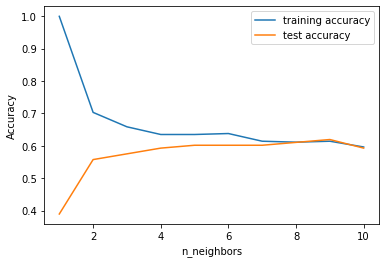

In [20]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(features, labels ,random_state=60)
training_accuracy = []
test_accuracy = []
acc_score= []
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
    y_predict = clf.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_predict))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(acc_score)

Observando los resultados colectados se puede concluir lo siguiente:

    1. El mejor accuracy que se va a obtener sería un 60%
    2. Esto sucede idealmente cuando ambas curvas se cruzan, de modo que para que no haya overfit o underfit se podrían utilizar 7 vecinos
    3. Al realizar variaciones sobre el random state, no se observaron mejoras significativas
    4. Los resultados obtenidos siguen siendo inferiores al random forest
    
    

## Naive Bayes

Procedemos finalmente a utilizar el último de método de los vistos en clase. 

In [21]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size =0.2,random_state=13)
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))
y_predict = nbg.predict(X_test)
accuracy_score(y_test, y_predict)

Training set score: 0.586
Test set score: 0.656


0.6555555555555556

Para este caso se intento mejorar la precision del training set, donde se observó que 0.2 arrojaba los mejores resultado. Por otro lado el random state en 13 mostró el mejor balance entre training accuracy y test accuracy.

# Análisis de datos utilizando nuevos métodos

## Métodos de ensamble

Primeramente este tipo de métodos, son aquellos que combinan varios modelos base para predecir un modelo predictivo óptimo. Un ejemplo de esto sería el random forest, el cual decide donde hacer los ajustes y cortes basándose en una selección aleatoria de características, en vez de utilizar un criterio fijo para hacer el corte. Los siguientes 2 métodos a implementar utilizarán este concepto, partiremos pirmero de la base del random forest y finalmente exploraremos Bagging meta-estimator



## Extremely Randomized Trees

En este tipo de árboles se explota aún mas la aleatoriedad en la forma en la cual se realizan los recortes del árbol. La idea  principal es partir del random forest, pero en vez de buscar en algún treshold para realizar la discriminación, estos se obtienen aleatoriamente para cada característica, se procede luego a seleccionar los mejores thresholds generados y se utilizando como regla de recorte. AL ser una especie de optimización del método que mejores resultados demostró, se espera que al menos iguale el resultado obtenido del randomforest

In [22]:
from sklearn.ensemble import ExtraTreesClassifier  

ExtraTreesClassifierModel = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
ExtraTreesClassifierModel.fit(X_train, y_train)
y_predict = ExtraTreesClassifierModel.predict(X_test)
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':ExtraTreesClassifierModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(11)

,importance
feature,
heart_rate,0.132144
t_interval,0.130227
qrs_duration,0.123426
age,0.097590
q-t_interval,0.091447
r_wave,0.082013
p_interval,0.078372
s_wave,0.076253
qrs,0.069276


In [23]:
 accuracy_score(y_test, y_predict)

0.6888888888888889

Notese la buena aproximación de este método realizando 1 solo intento. Se realizaron pruebas sobre los parametros del modelo para obtener el mejor accuracy. Se observó que el accuracy no mejoró con ninguún parametro a excepción de el numero de estimadores, el cual mostró el mejor accuracy de la investigación en 71%, utilizando 70 estimadores

In [24]:
from sklearn.ensemble import ExtraTreesClassifier  

ExtraTreesClassifierModel = ExtraTreesClassifier(n_estimators=70, max_depth=None,min_samples_split=2, random_state=0)
ExtraTreesClassifierModel.fit(X_train, y_train)
y_predict = ExtraTreesClassifierModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7111111111111111

## Bagging meta-estimator

Finalmente con el objetivo de explorar un último modelo, se implementa el Bagging meta-estimator. Este método utiliza otros classificadores como base en subconjuntos aleatorios del dataset original y luego genera un agreagado apartir de sus propias predicciones. Se suele utilizar este méotodo para reducir la variacion de un estimador de caja negra. 


In [28]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(ExtraTreesClassifierModel, max_samples=0.9, max_features=0.9)
bagging.fit(X_train, y_train)
y_predict = bagging.predict(X_test)
accuracy_score(y_test, y_predict)


0.7333333333333333

Notese que el modelo se podía alimentar de otro clasificador, en este caso lo alimentamos del método anterior que generaba la mejor precisión, al implementar esta estrategia se logró mejorar ligeramente el accuracy a 73% 

# Conclusiones 

- Se obtuvo resultados satisfactorios para un set de datos con una complejidad relativamente alta en comparación del ejericio utilizado en clase. Donde se logró obtener un máximo de 73%
- Lo métodos de ensamble fueron los que mostraron la mejor precision en los modelos obtenidos, principalmente porque estos utilizan varios modelos para mejorar sus resultados
- La naturaleza del conjunto de datos (muchos posibles valores para el eje y, muy pocos datos para un label relativamente complejo), fue una de las razones por las cuales la presición fue baja en comparación de estudios como los vistos en clases, sin embargo los resultados fueron satisfactorios en comparación a los resultados obtenidos de este paper  http://www.cs.bilkent.edu.tr/tech-reports/1998/BU-CEIS-9802.pdf
- Es posible que realizando un estudio en unicamente los 2 tipos de arritmias más frecuentemente encontradas, el accuracy aumente significativamente

La siguiente tabla sumariza los resultados obtenidos para los diferentes métodos

<table> 
  <tr>
    <th>Método </th>
    <th>Accuracy (%)</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>64.6</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>69.91</td>
  </tr>
  <tr>
    <td>KNeighborsClassifier</td>
    <td> 61.94</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>65.56</td>
  </tr>
  <tr>
    <td>Extremely Randomized Trees</td>
    <td>71.11</td>
  </tr>
  <tr>
    <td>Bagging meta-estimator</td>
    <td>73.33</td>
  </tr>
</table> 

